<a href="https://colab.research.google.com/github/blackscreen-whitetext/AIDS/blob/main/UMC301_Assignment_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UMC 301
## Assignment 1b

###Submission instructions:


1.   The assignment is to be submitted in ONE single notebook.
2.   Submit the .ipynb file and pdf of the same with all cells open through this Teams Assignment.
3. If your IISc email ID is < username > @iisc.ac.in, then name the file < username >_Assgn_1b. E.g. jonathan_Assgn_1b for email ID jonathan@iisc.ac.in.
4. Before submission, execute the ’Restart session and run all’ option from the Runtime/Kernel tab. Verify that there are no errors and that you are getting the output you expect.
5. Use the dataset **'SeoulBikeData.csv'**: https://www.dropbox.com/scl/fi/tofrz23mx38tbsrtar1lx/SeoulBikeData.csv?rlkey=zlvra2py146p5lrynxnzijc1p&dl=1


# Use XGBoost regression model to predict the bike count required at each hour for the stable supply of rental bikes.

###**Data Description**

###  The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


**Attribute Information:**

*  Date : dd/mm/yyyy
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
*  Functional Day - No(Non Functional Hours), Yes(Functional hours)

##a. Data preprocessing

1. Import modules and load data.
2. Feature engineering
  * Check for null and duplicates in the data.
  * Add weekend data, month data.
  * Identify the datatypes.
  * Check whether all int/float datatypes falls into numerical feature category.
  * Seperate features into numerical and categorical.



In [313]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
#from sklearn import XGBRegressor

In [314]:
data = pd.read_csv('SeoulBikeData.csv')
data.head()
# Check for null values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())
data['Month'] = pd.to_datetime(data['Date'], format='%d/%m/%y').dt.month
data["Is_weekend"] = pd.to_datetime(data['Date'], format='%d/%m/%y').dt.weekday.apply(lambda x: 1 if x > 4 else 0)
#data["Is_weekend"].value_counts()
data.drop(['Date'], axis=1, inplace=True)
print(data.dtypes)
categorical_features = ["Hour",'Seasons', 'Holiday', 'Functioning Day',"Month","Is_weekend"]
categorical_data = data[categorical_features]
numerical_data = data.drop(categorical_features, axis=1)
numerical_features = numerical_data.columns.tolist()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64
0
Rented Bike Count             int64
Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
Month                         int32
Is_weekend                    int64
dtype: object


##b.  Data visualization and encoding

1. Visualize how the rented bike count varies hourly for different categorical features.
2. Visualize the rented bike count outliers for each categorical features.
3. Visualize the variation in the data distribution for each numerical features. Also, mark/show the mean and median of the distribution in the plot.
4. Visualize the outliers in each numerical feature data.
5. create a regression plot to know relation between dependent and independent nuumerical variables.
6. Visualize the correlation between different numerical features using heat map. Find and remove correlated features for a threshold value of 0.7 (correlation>0.7).

  **Comment your analysis from each plots.**

7. Encoding categorical features (**Use pipelines**).
  * One-hot encoding for seasons.
  * Numerical encoding (1 or 0) for categorical features with 2 unique values.
  * Use numerical identifier for other categorical features (eg. month: January-1, march-3)
8. Delete non-relevant feautes from the dataframe and comment.
9. Visualize the dependent variable data-distribution and check for skewness. The regression assumes that the dependent variable has a nearly normal distribution, therefore, to meet this assumption, make some measures to normalize the distribution, if necessary.

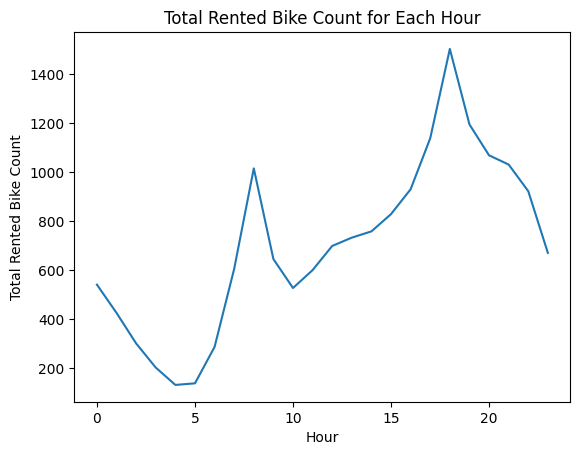

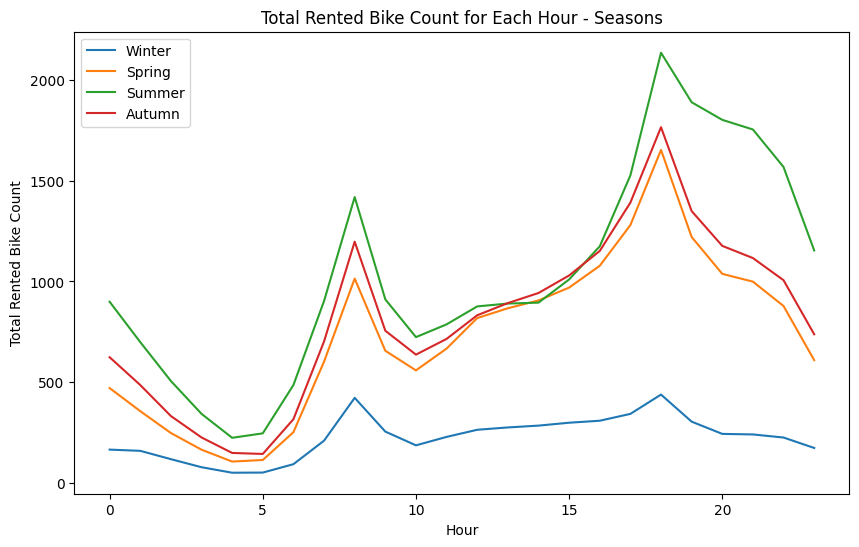

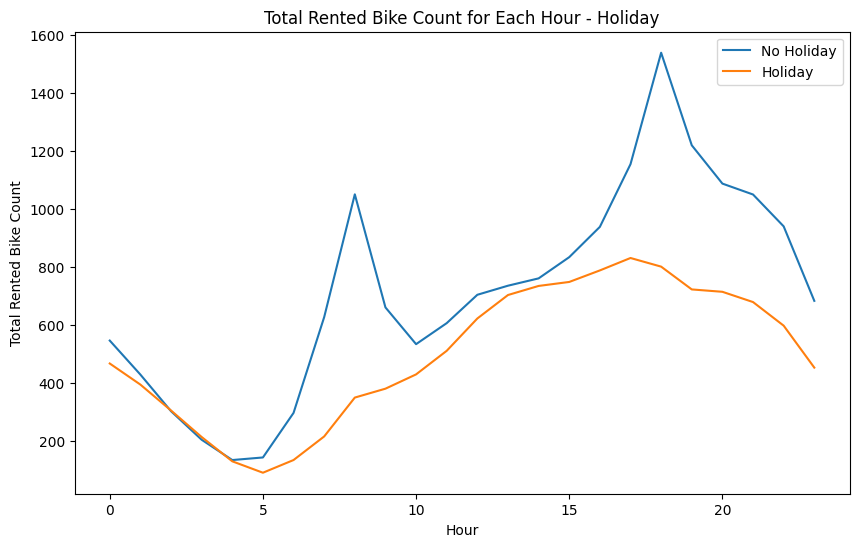

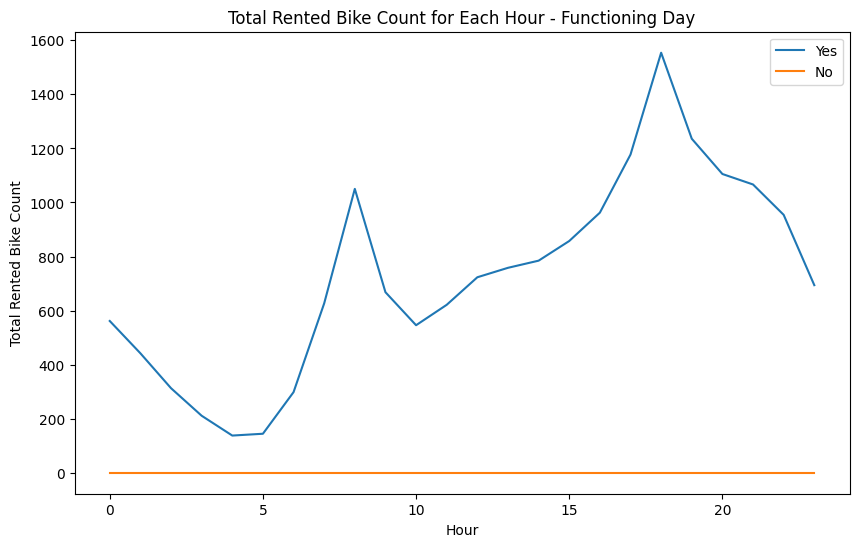

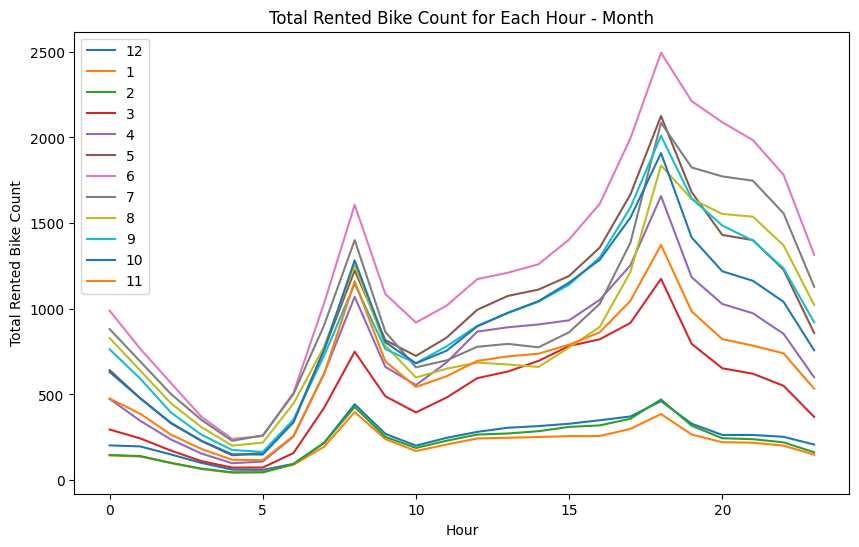

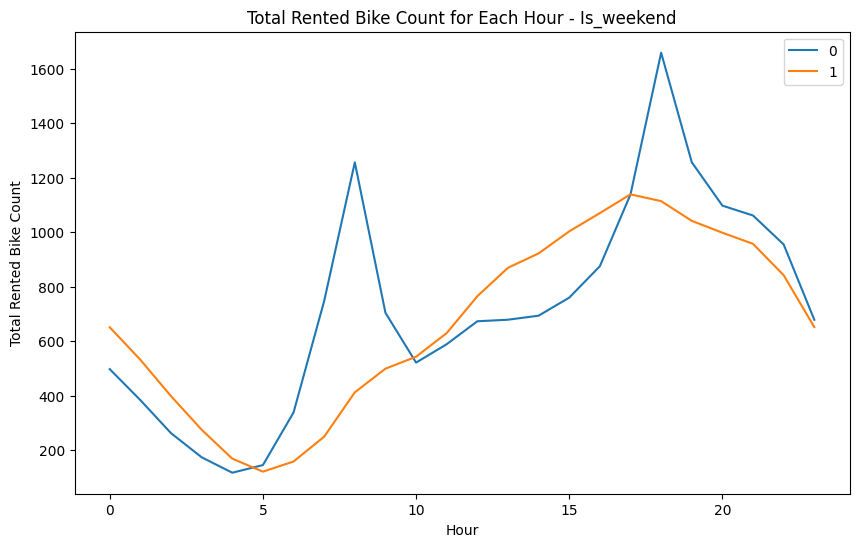

In [315]:
# Iterate over the unique values of each categorical feature
for feature in categorical_features:
    if feature != 'Hour':
        unique_values = categorical_data[feature].unique()
        
        # Plot the line plot for each unique value
        plt.figure(figsize=(10, 6))
        for value in unique_values:
            value_data = data[data[feature] == value]
            total_count = value_data.groupby('Hour')['Rented Bike Count'].mean()
            plt.plot(total_count.index, total_count.values, label=value)
        
        # Set the x-axis label
        plt.xlabel('Hour')
        
        # Set the y-axis label
        plt.ylabel('Total Rented Bike Count')
        
        # Set the title of the plot
        plt.title(f'Total Rented Bike Count for Each Hour - {feature}')
        
        # Add a legend
        plt.legend()
        
        # Show the plot
        plt.show()
    else:
        total_count = data.groupby('Hour')['Rented Bike Count'].mean()
        plt.plot(total_count.index, total_count.values)
        plt.xlabel('Hour')
        plt.ylabel('Total Rented Bike Count')
        plt.title('Total Rented Bike Count for Each Hour')
        plt.show()

Plots suggest most rentals for June, in summer, non-holidays during hours 5-10 and 17-23, holidays during 0-5 and 10-17 and functioning days. Least rentals for winter, November. Generally, hour 17 has highest rentals.

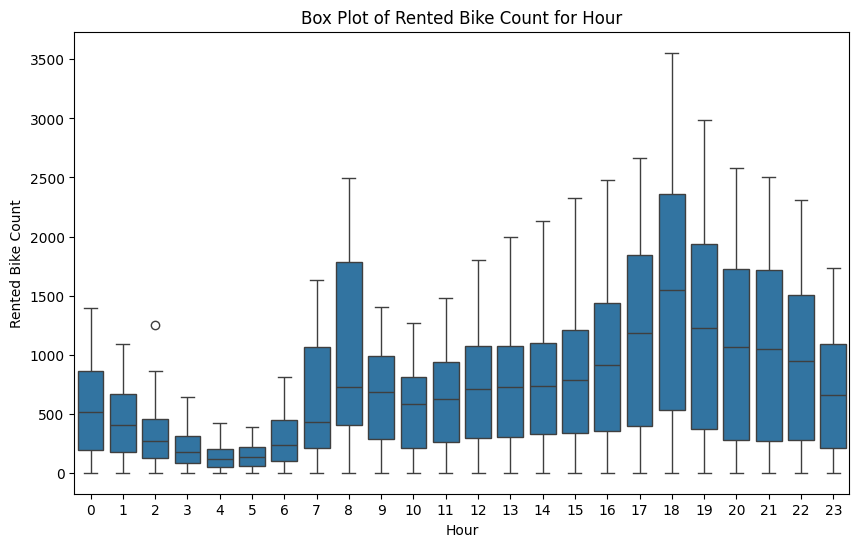

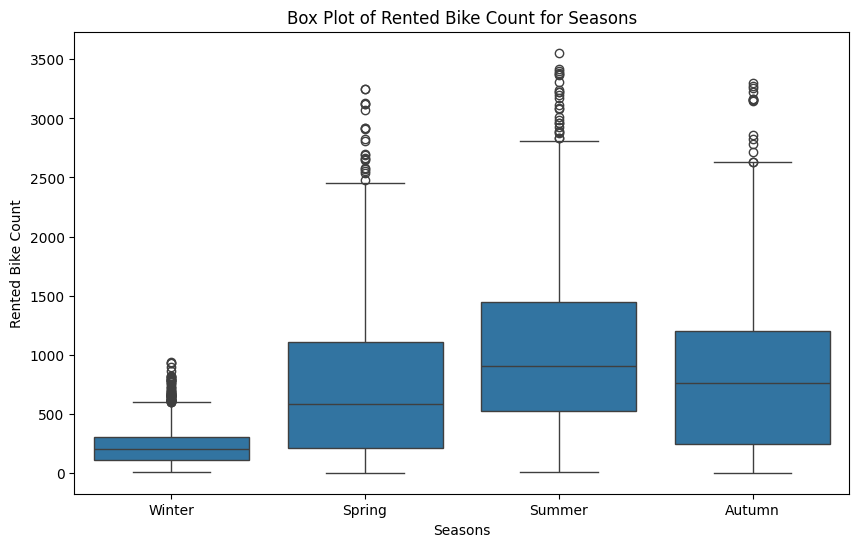

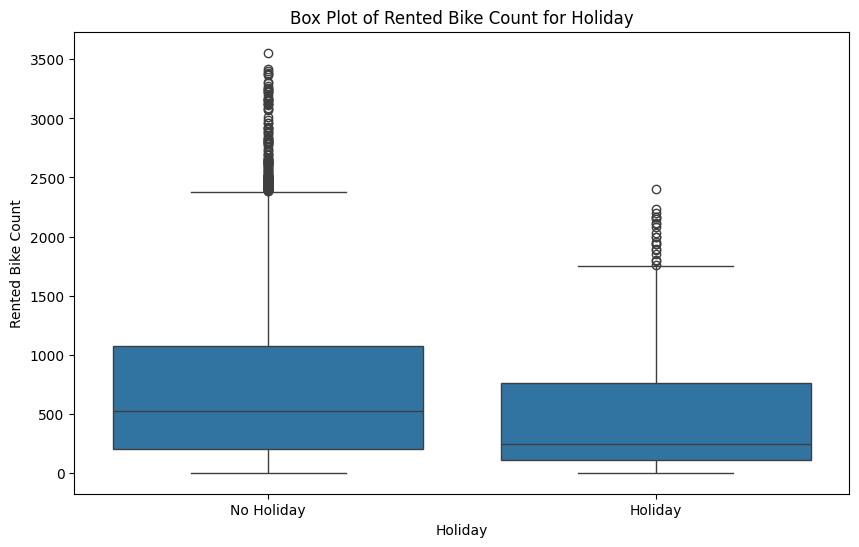

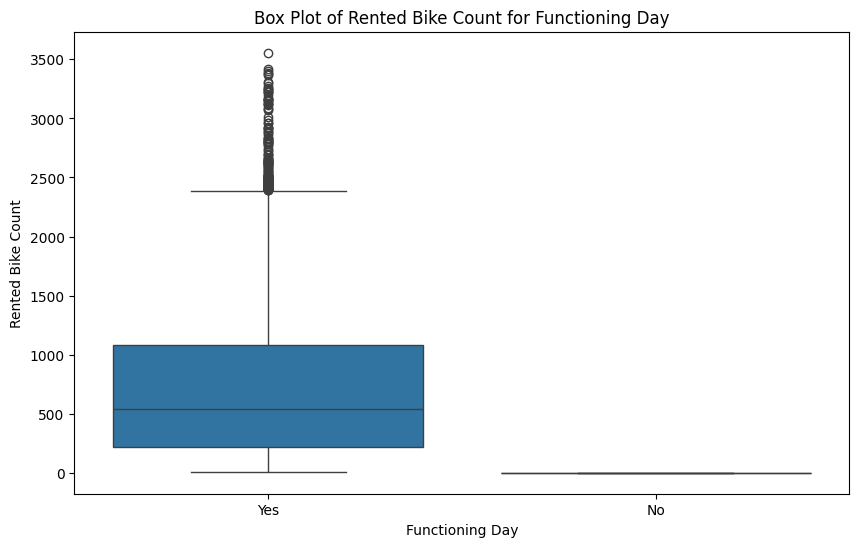

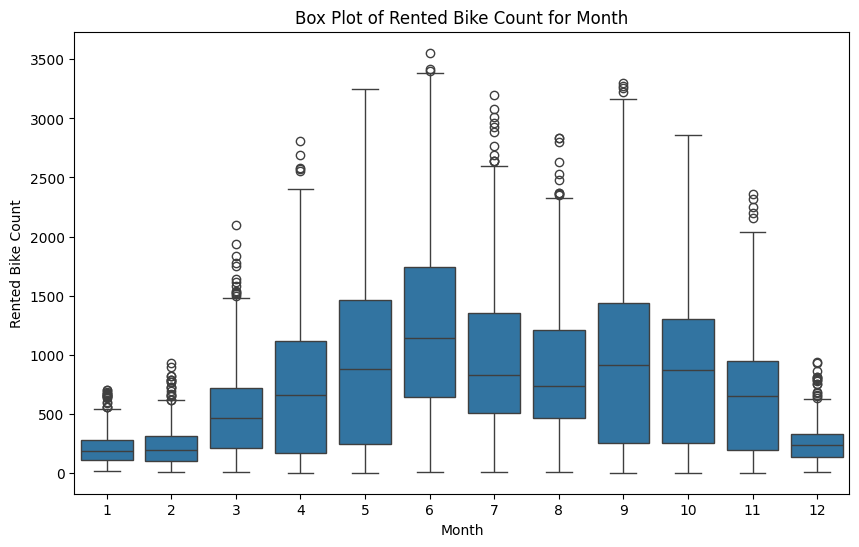

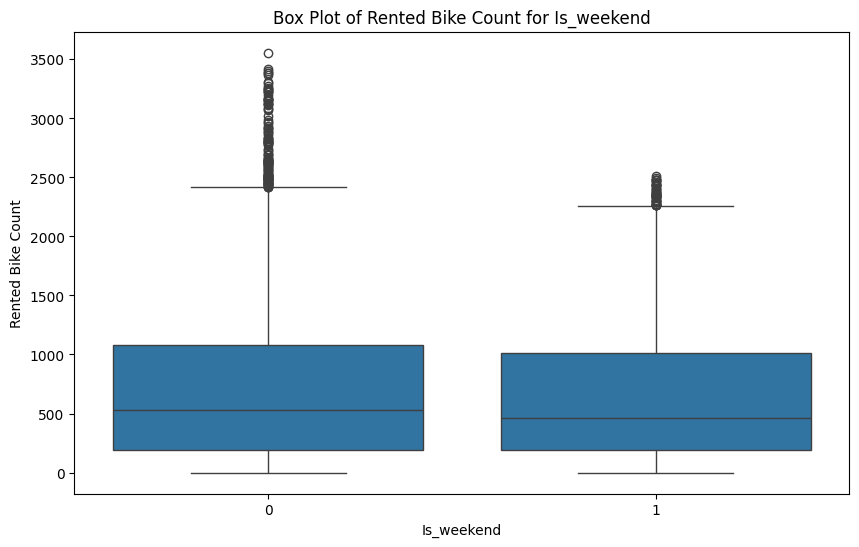

In [316]:
# Iterate over the categorical features
for feature in categorical_features:
    #if feature != 'Hour':
        # Create a box plot for each unique value of the feature
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature, y='Rented Bike Count', data=data)
        plt.title(f'Box Plot of Rented Bike Count for {feature}')
        plt.show()

More and bigger outliers for non weekends, biggest outliers for June, larger number of outliers for March, bigger and more outliers in summer, no outliers for non functioning days.

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


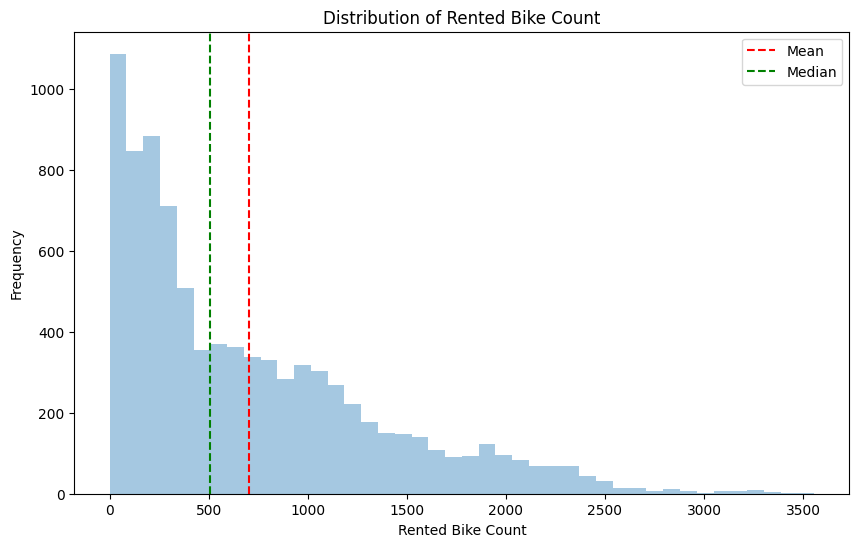

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


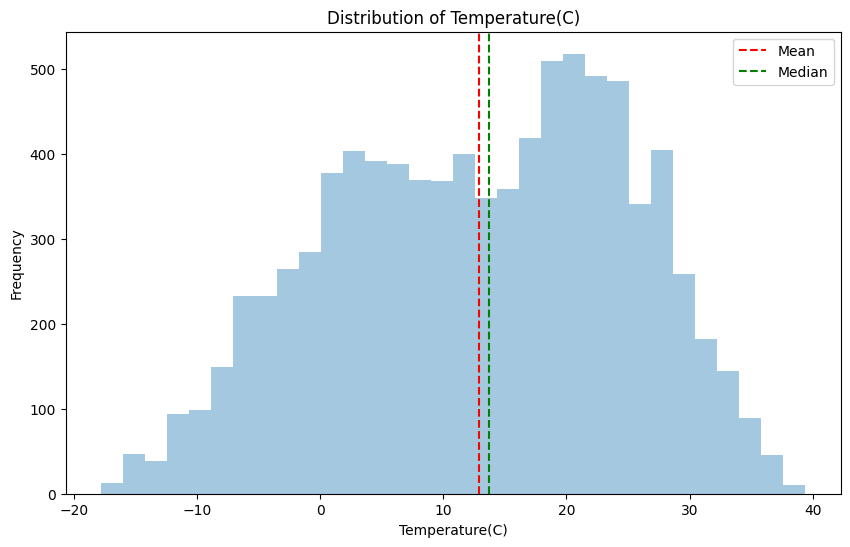

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


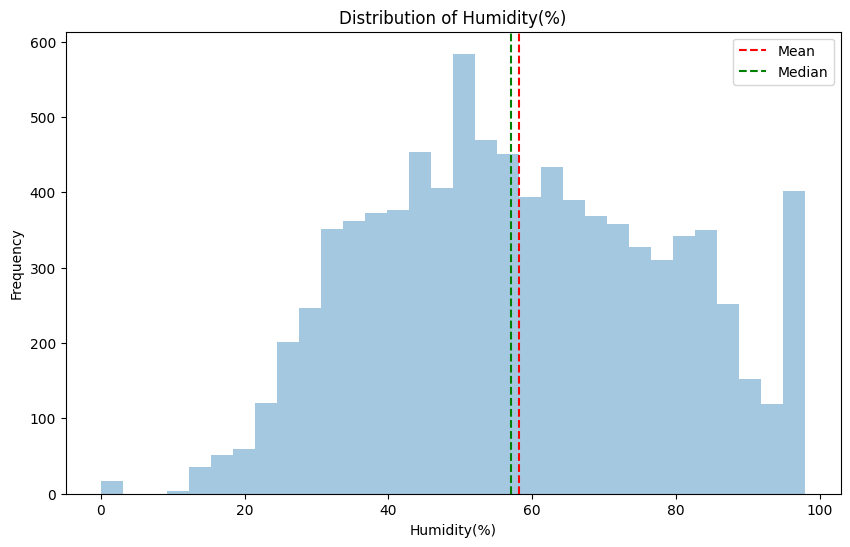

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


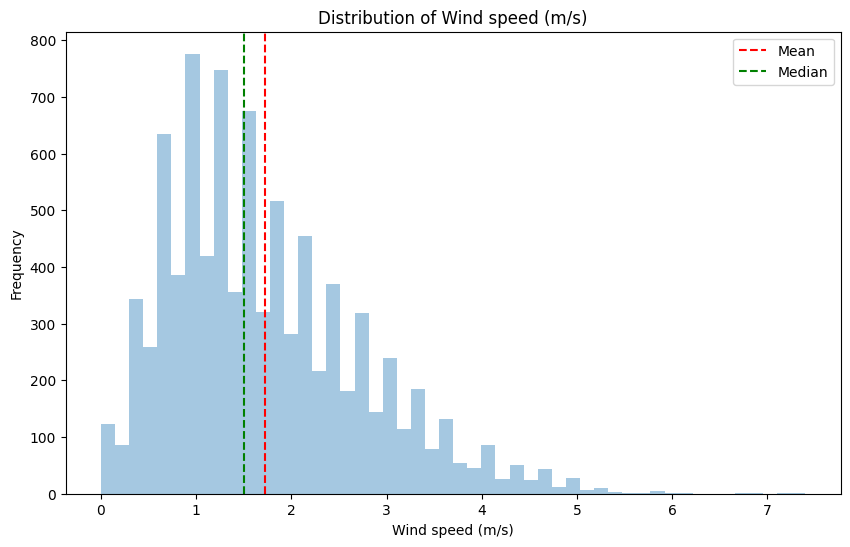

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


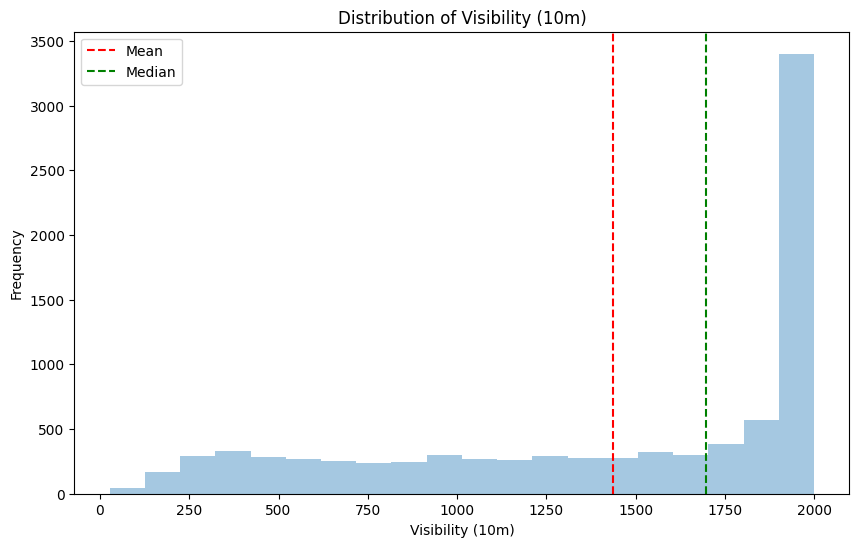

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


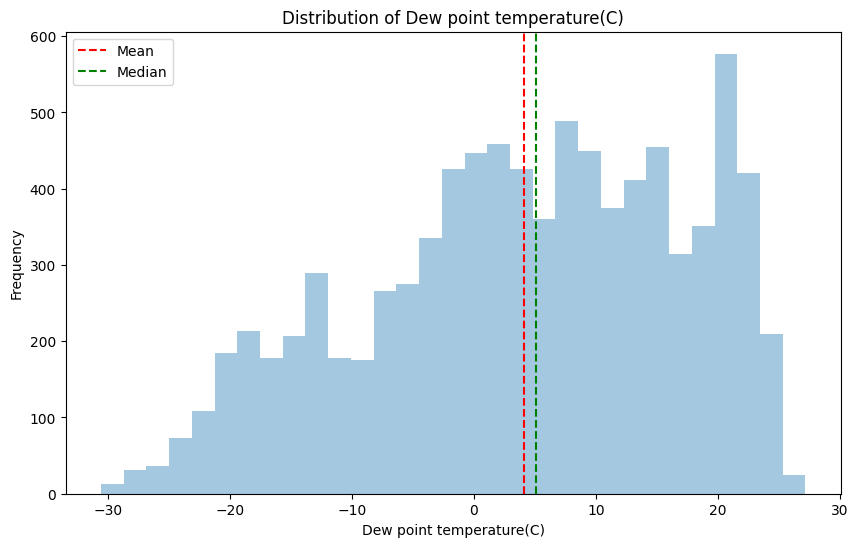

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


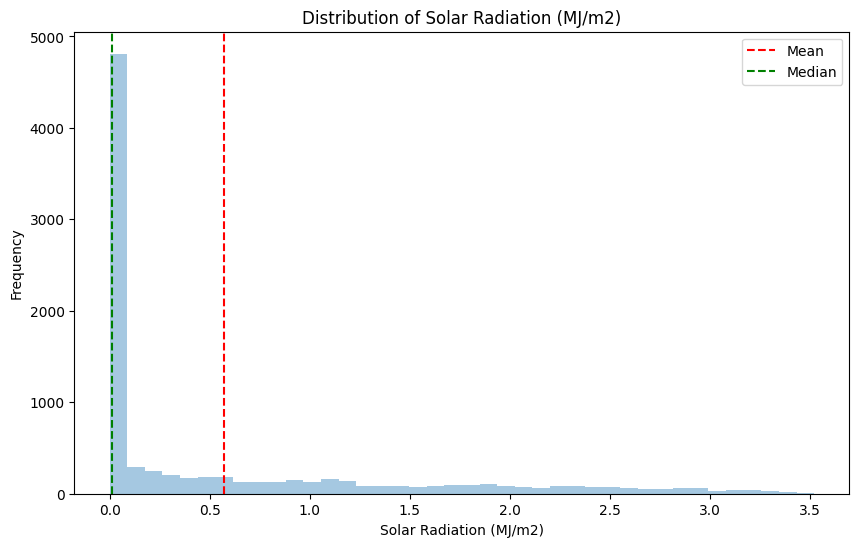

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


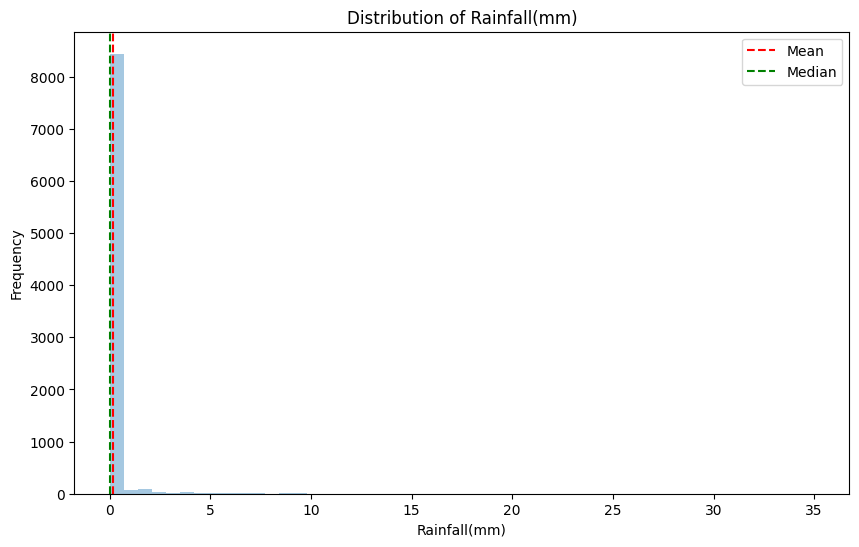

/tmp/ipykernel_2184/3119600600.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(numerical_data[feature], kde=False)


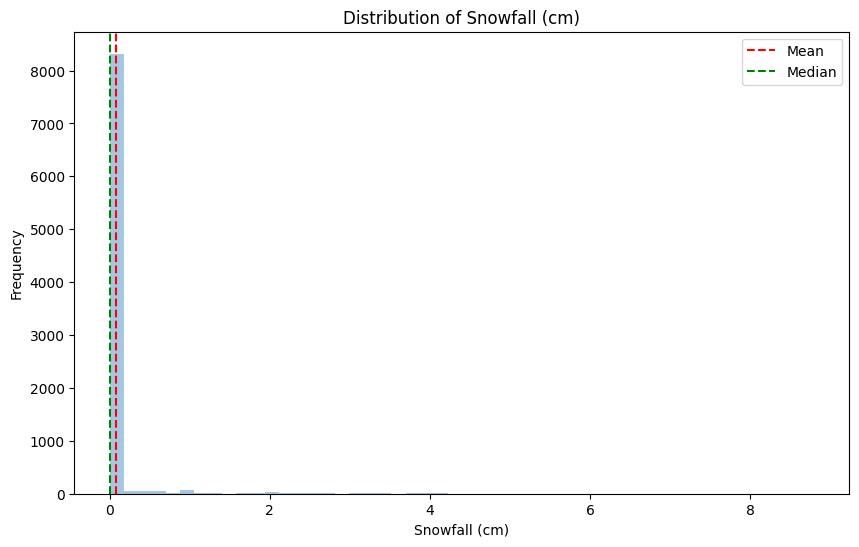

In [317]:
# Iterate over the numerical features
for feature in numerical_features:
    # Create a subplot for each feature
    plt.figure(figsize=(10, 6))
    ax = sns.distplot(numerical_data[feature], kde=False)
    
    # Get the mean and median of the feature
    mean = numerical_data[feature].mean()
    median = numerical_data[feature].median()
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='r', linestyle='--', label='Mean')
    ax.axvline(median, color='g', linestyle='--', label='Median')
    
    # Set the x-axis label
    plt.xlabel(feature)
    
    # Set the y-axis label
    plt.ylabel('Frequency')
    
    # Set the title of the plot
    plt.title(f'Distribution of {feature}')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

Temperature, Humidity, Dew Point Temperature are more normalised with mean and median close at the center. Wind speed is slightly skewed and resembles a chi squared distribution. Others are extremely skewed. A high difference in mean and median can be the consequence of outliers as can be seen with Solar Radiation and Visibility. Rented Bike Counts and Wind Speed have some difference, others have little difference.

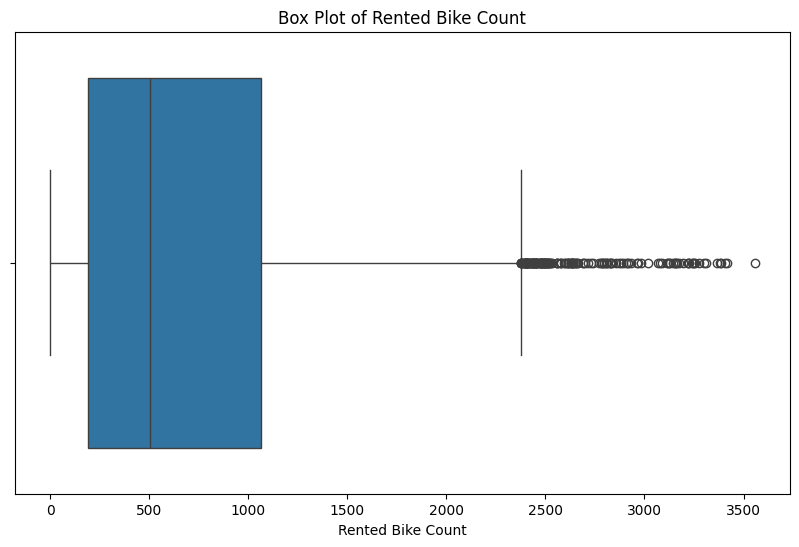

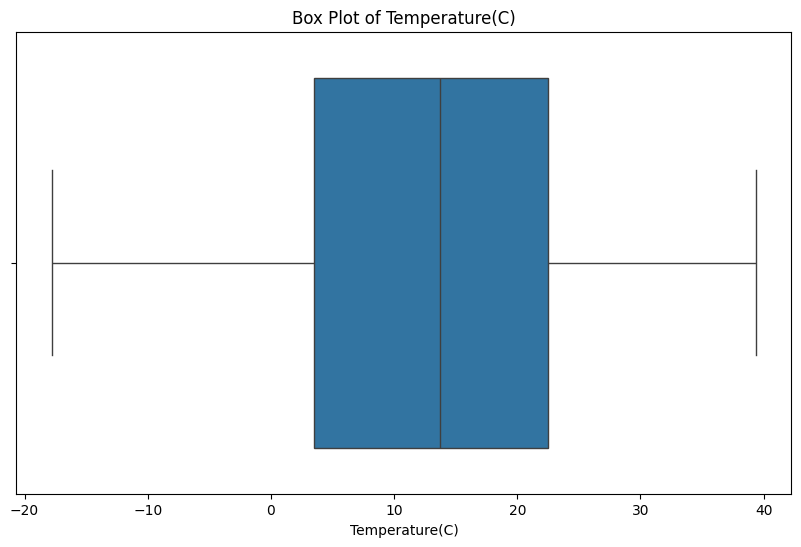

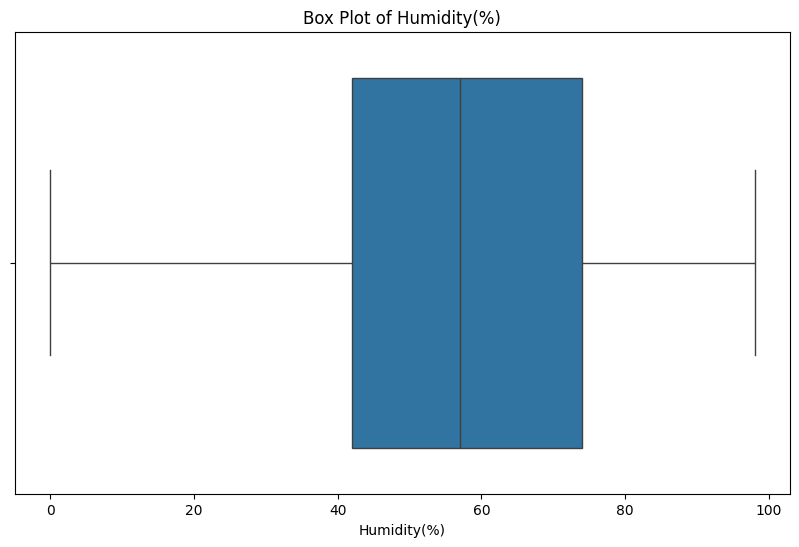

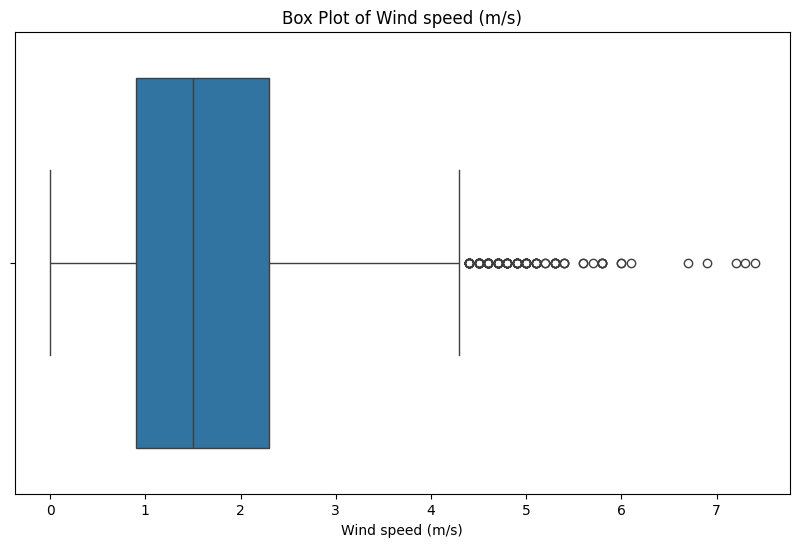

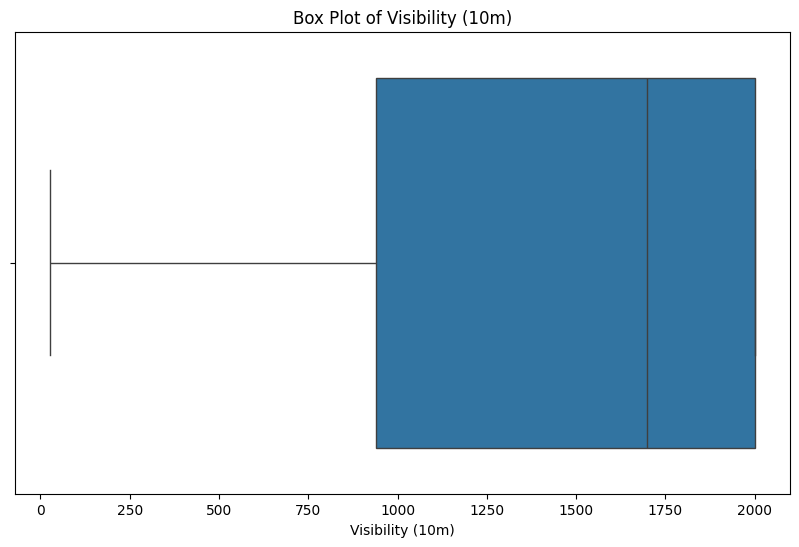

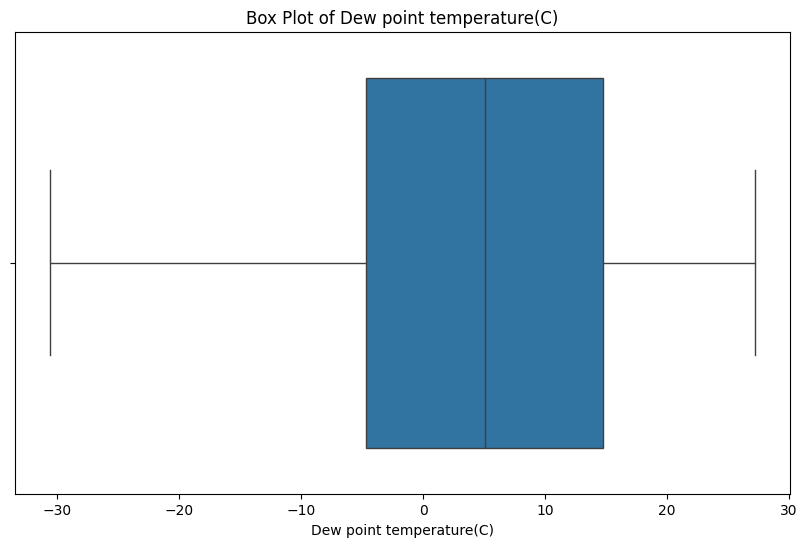

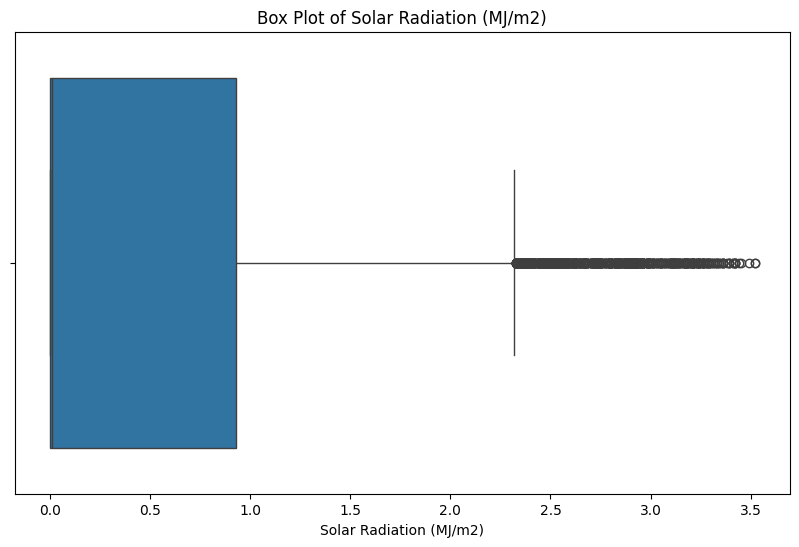

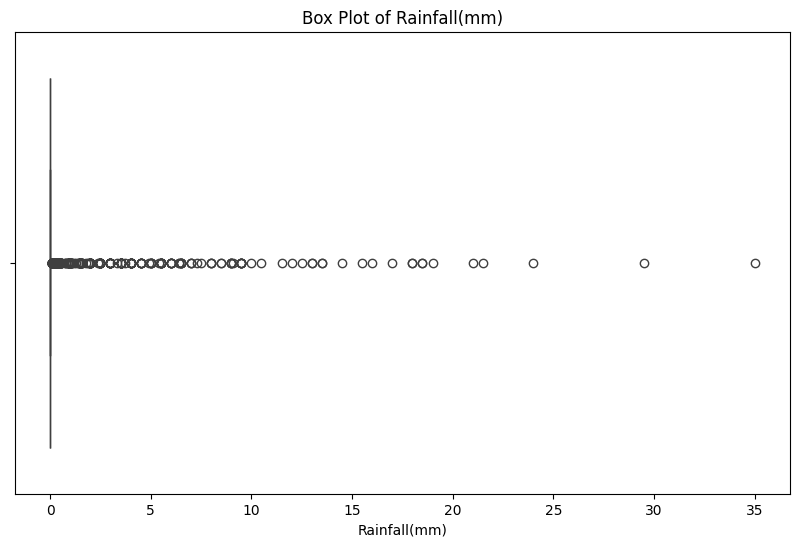

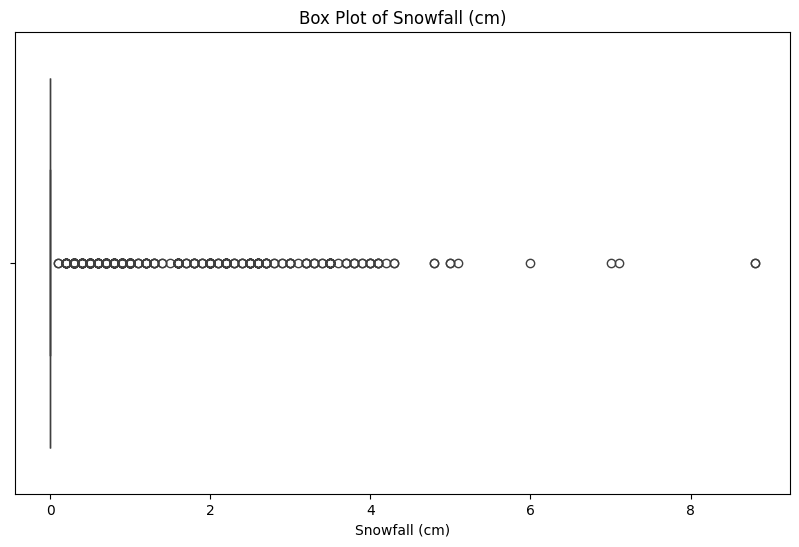

In [318]:
# Iterate over the numerical features
for feature in numerical_features:
    # Create a box plot for each feature
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=numerical_data[feature])
    plt.xlabel(feature)
    plt.title(f'Box Plot of {feature}')
    plt.show()

Temperature, Humidity, Visibility and Dew Point Temperature have no outliers. Rainfall and Snowfall values are generally close or equal to zero, hence any small observation is significant to be an outlier. Solar Radiation and Rented Bikes have good number of outliers demonstrating that variability caused due to various factors like season.

['Rented Bike Count', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


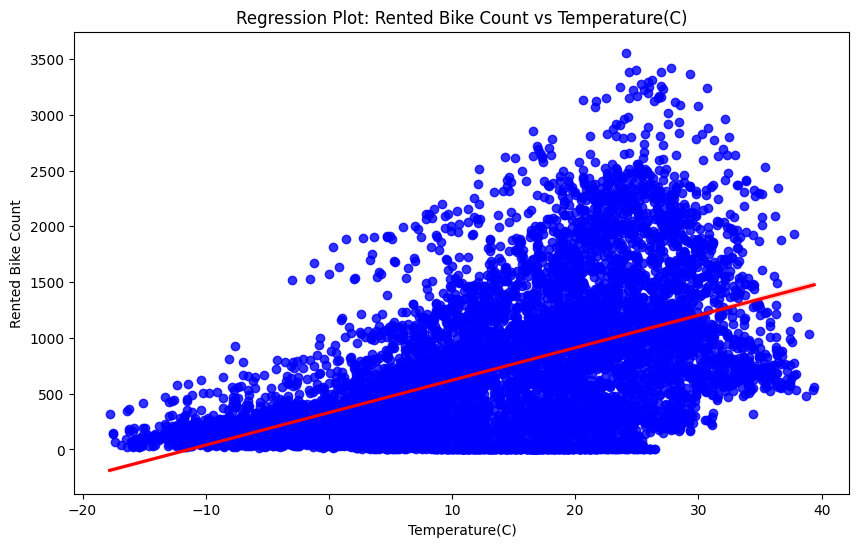

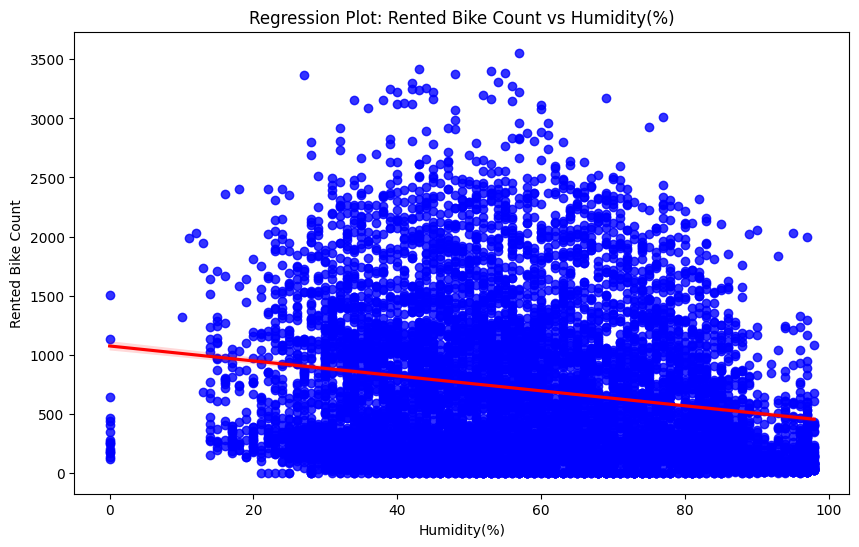

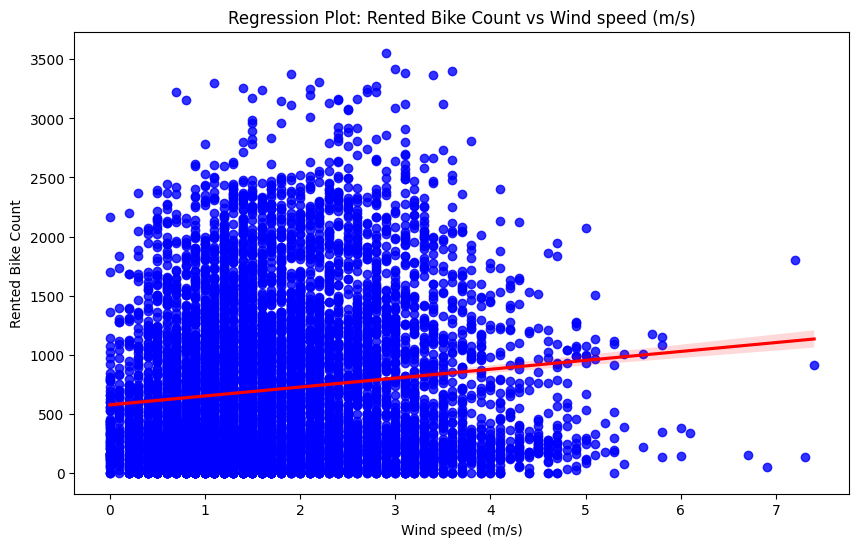

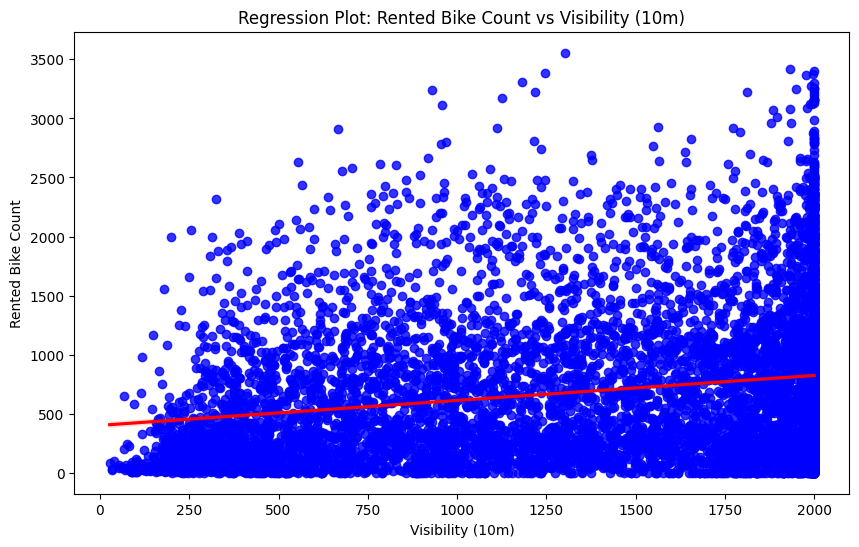

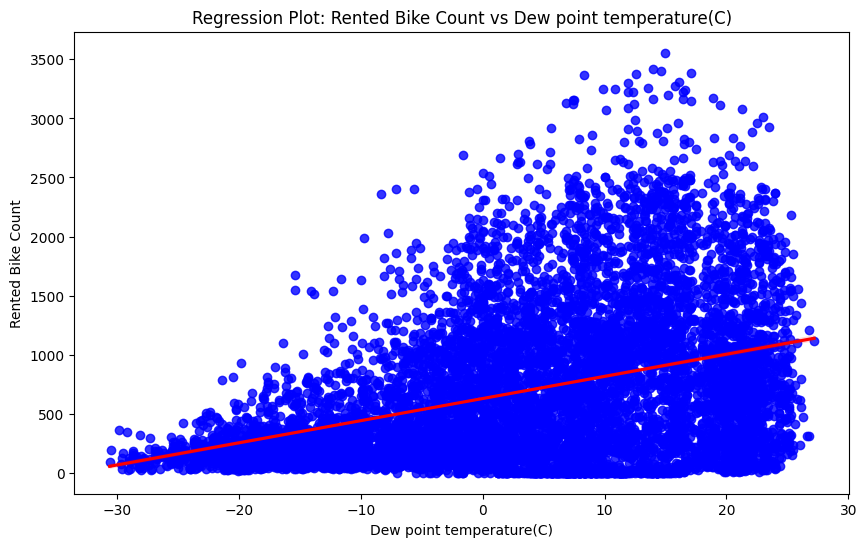

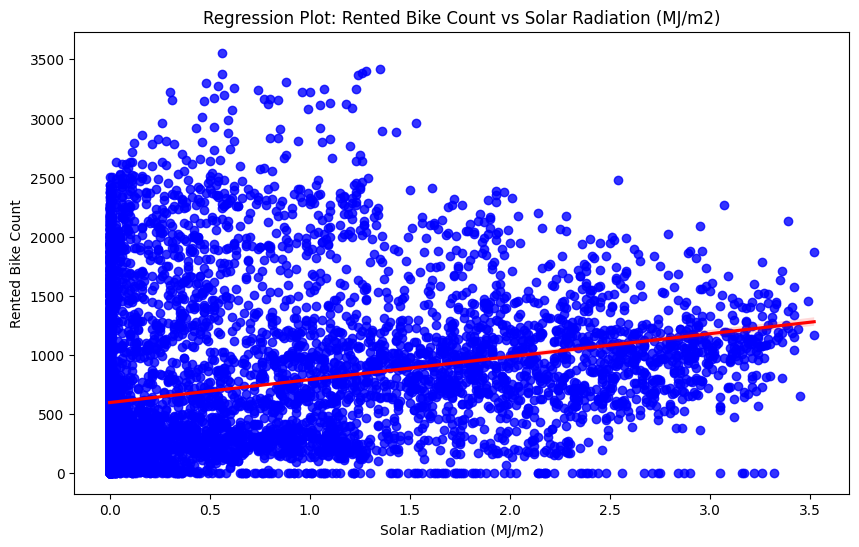

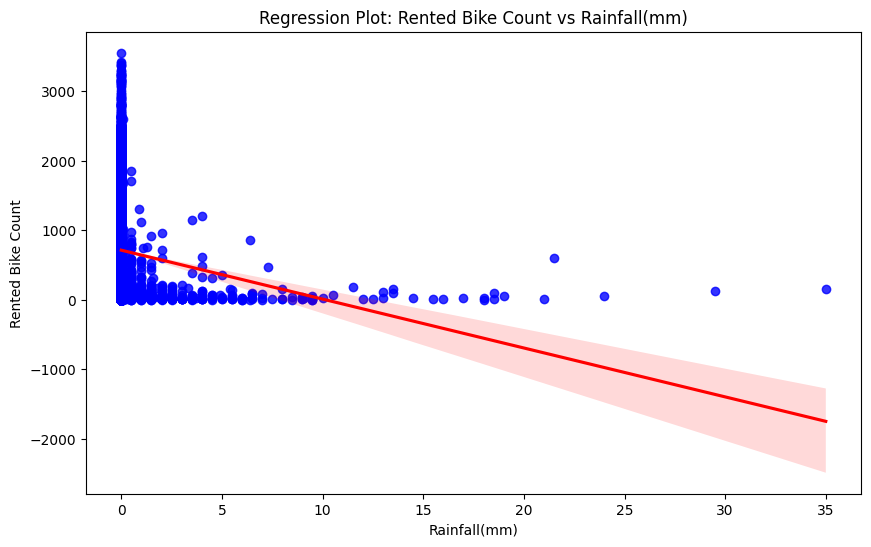

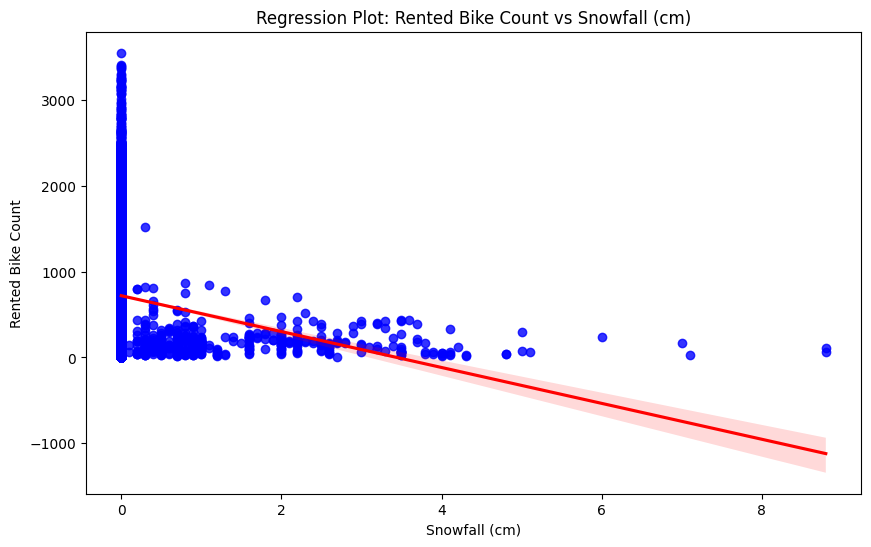

In [319]:
import seaborn as sns
print(numerical_features)

# Iterate over the numerical features
for feature in numerical_features:
    # Create a regression plot
    if feature != "Rented Bike Count":
        plt.figure(figsize=(10, 6))
        sns.regplot(x=feature, y='Rented Bike Count', data=numerical_data, color='r', scatter_kws={'color': 'b'})
        plt.xlabel(feature)
        plt.ylabel('Rented Bike Count')
        plt.title(f'Regression Plot: Rented Bike Count vs {feature}')
        plt.show()

Factors correlating negatively with rented bikes: Humidity, Snowfall, Rainfall.
This suggests a decrease in rented bikes with increase in any of these factors, keeping other factors constant.
Rest correlate positively.
Highest positive correlation: Temperature
Highest negative correlation: Rainfall

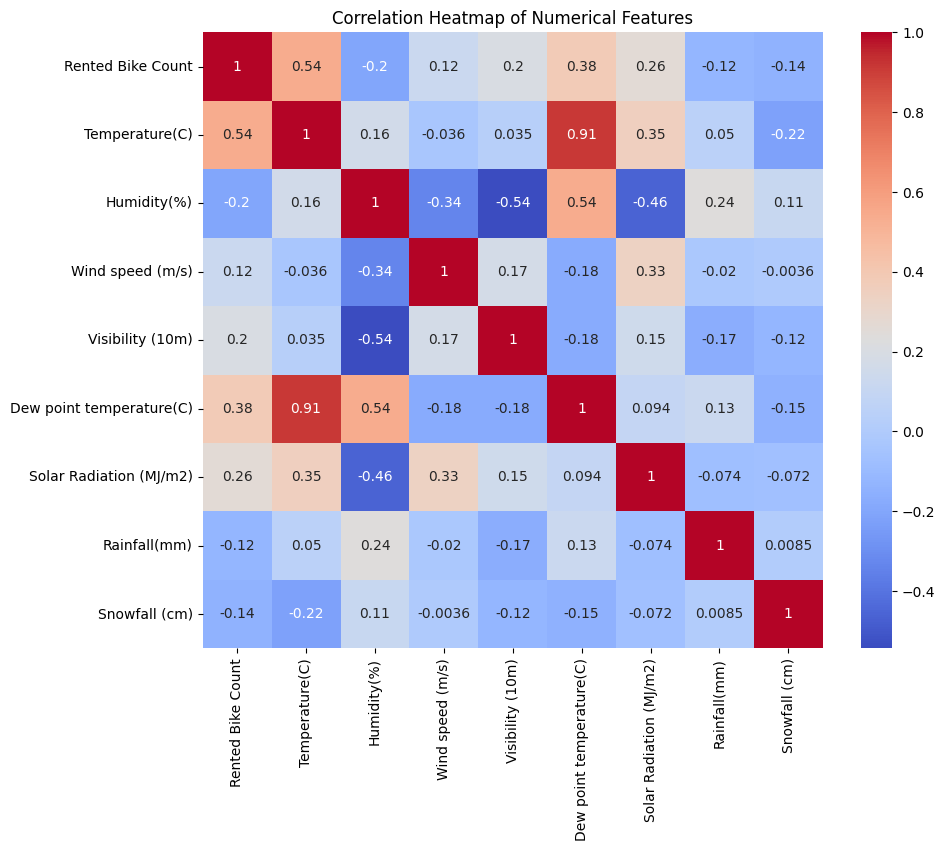

In [320]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Find and remove correlated features
correlation_threshold = 0.7
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove correlated features from numerical_data
data = data.drop(correlated_features, axis=1)

Dew point temperature correlates highly with temperature and must be removed. The highest negative correlation is visibility with humidity.

In [323]:
# Sample DataFrame

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', OrdinalEncoder(), ['Holiday', 'Is_weekend', 'Functioning Day']),
        ('onehot', OneHotEncoder(), ['Seasons']),
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply the pipeline to the DataFrame
data_encoded = pipeline.fit_transform(data)

# Convert the result to a DataFrame with appropriate column names
# Get one-hot encoded column names
onehot_columns = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(['Seasons'])

# Combine all column names
all_columns = ['Holiday', 'Is_weekend', 'Functioning Day'] + list(onehot_columns) 

# Create a DataFrame with the transformed data
data_encoded = pd.DataFrame(data_encoded, columns=all_columns)
for column in data_encoded.columns:
    data[column] = data_encoded[column]
print(data)


      Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0            -5.2           37               2.2   
1                   204     1            -5.5           38               0.8   
2                   173     2            -6.0           39               1.0   
3                   107     3            -6.2           40               0.9   
4                    78     4            -6.0           36               2.3   
...                 ...   ...             ...          ...               ...   
8755               1003    19             4.2           34               2.6   
8756                764    20             3.4           37               2.3   
8757                694    21             2.6           39               0.3   
8758                712    22             2.1           41               1.0   
8759                584    23             1.9           43               1.3   

      Visibility (10m)  Solar Radiation

In [327]:
#data.drop(['Wind speed (m/s)','Solar Radiation (MJ/m2)',"Seasons"], axis=1, inplace=True)

In my opinion solar radiation has less to do with big rentals and is kind of correlated with temperature, so should be removed.

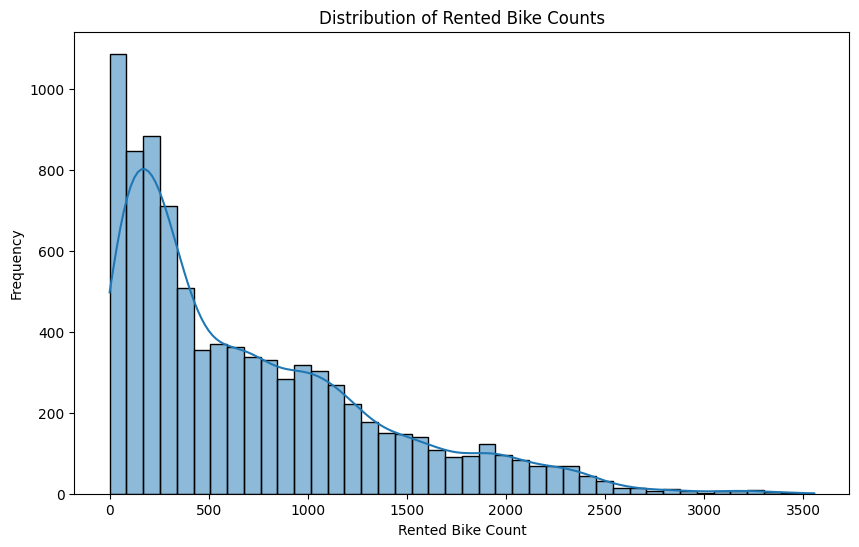

In [328]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rented Bike Count'], kde=True)
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rented Bike Counts')
plt.show()

In [329]:
data["Transformed Rented Bike Count"] = stats.yeojohnson(data['Rented Bike Count'])[0]

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Transformed Rented Bike Count'], kde=True)
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Distribution of Rented Bike Counts')
plt.show()

##c. Build, train, test and optimize the model
1. Seperate target and features from the data.
2. Do 80:20 train test split.
3. Train the XGBoost regression model with default parameters.
  * Report $r^2$ and RMSE values for train and test datasets.
  * Plot actual vs predicted for the test data.
  * Plot feature importance and report top 5 features (use importance_type='gain').
4. Tune the hyperparameters of the model using Optuna. Specify the parameter values used.
  * Report $r^2$ and RMSE values for train and test datasets.
  * Plot actual vs predicted for the test data.
  * Plot feature importance and report top 5 features (use importance_type='gain').

    **compare with the default model and comment**


In [330]:
data.drop(["Seasons"], axis=1, inplace=True)

In [331]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Month',
       'Is_weekend', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Transformed Rented Bike Count'],
      dtype='object')

In [332]:
X = data.drop(['Transformed Rented Bike Count',"Rented Bike Count"], axis=1)
y = data['Transformed Rented Bike Count']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [333]:
X_train.columns

Index(['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Month', 'Is_weekend',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [334]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create an instance of XGBRegressor
model = XGBRegressor(objective = "reg:squarederror",seed = 42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE for the training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate R-squared and RMSE for the test data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("Training Results:")
print(f"R-squared: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print()
print("Test Results:")
print(f"R-squared: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")

Training Results:
R-squared: 0.9878
RMSE: 1.0994

Test Results:
R-squared: 0.9453
RMSE: 2.3111


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


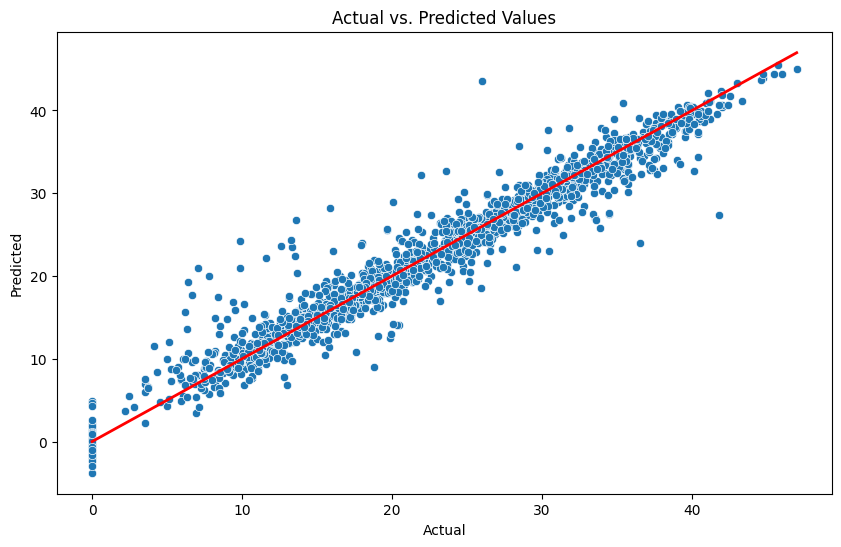

In [335]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

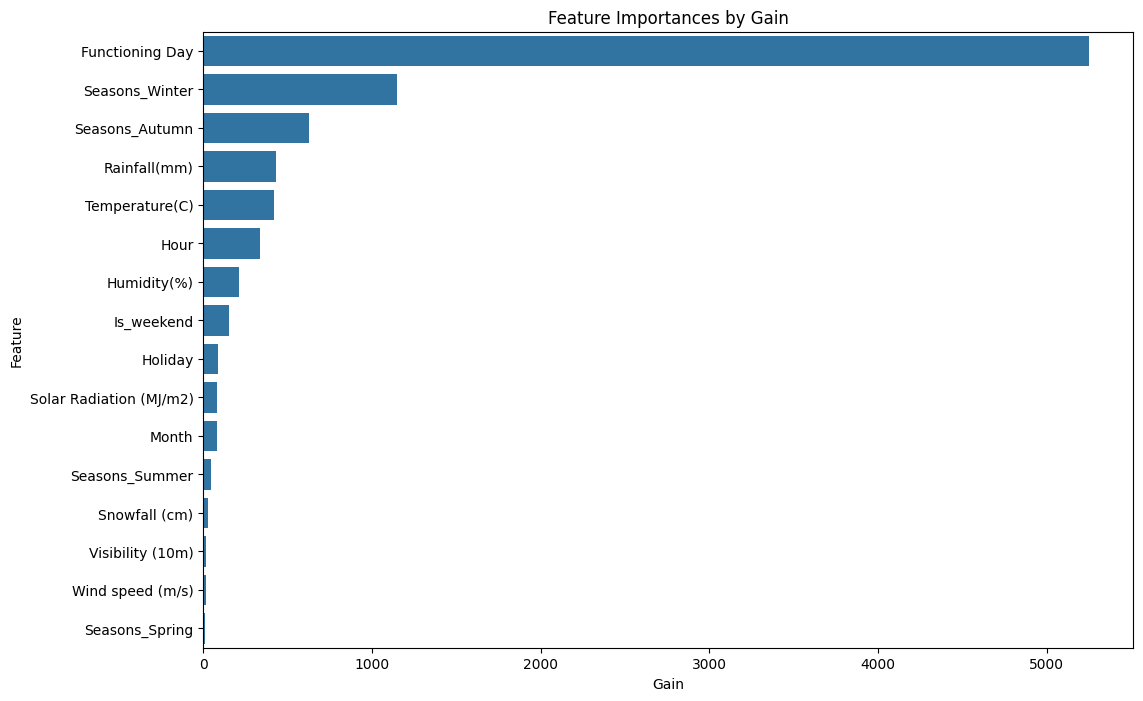

Top 5 features by gain:
            Feature         Gain
9   Functioning Day  5250.891113
15   Seasons_Winter  1149.257935
12   Seasons_Autumn   629.401672
6      Rainfall(mm)   433.642792
1    Temperature(C)   419.737610


In [336]:
importances = model.get_booster().get_score(importance_type='gain')
importances_df = pd.DataFrame(list(importances.items()),
columns=['Feature', 'Gain'])
importances_df = importances_df.sort_values(by='Gain',
ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Gain', y='Feature', data=importances_df)
plt.title('Feature Importances by Gain')
plt.show()
top_5_features = importances_df.head(5)
print("Top 5 features by gain:")
print(top_5_features)

In [343]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 1.0)
    }
    
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    
    return rmse_test

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_rmse = study.best_value

print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)



[I 2024-09-01 19:07:08,258] A new study created in memory with name: no-name-9d541280-033f-4d2b-a7e9-33656c542842
/tmp/ipykernel_2184/808904625.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_2184/808904625.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_2184/808904625.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree',

Best Hyperparameters: {'n_estimators': 644, 'max_depth': 9, 'learning_rate': 0.03136282078557195, 'subsample': 0.8000712260792693, 'colsample_bytree': 0.8948536146361317, 'gamma': 0.06141452011321124, 'reg_alpha': 0.06678294814467946, 'reg_lambda': 0.1881569842812817}
Best RMSE: 2.05956887149532


In [344]:
# Create an instance of XGBRegressor with the best parameters
model = xgb.XGBRegressor(objective="reg:squarederror",**best_params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared and RMSE for the training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)

# Calculate R-squared and RMSE for the test data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print("Training Results:")
print(f"R-squared: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print()
print("Test Results:")
print(f"R-squared: {r2_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")


Training Results:
R-squared: 0.9990
RMSE: 0.3218

Test Results:
R-squared: 0.9566
RMSE: 2.0596


/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


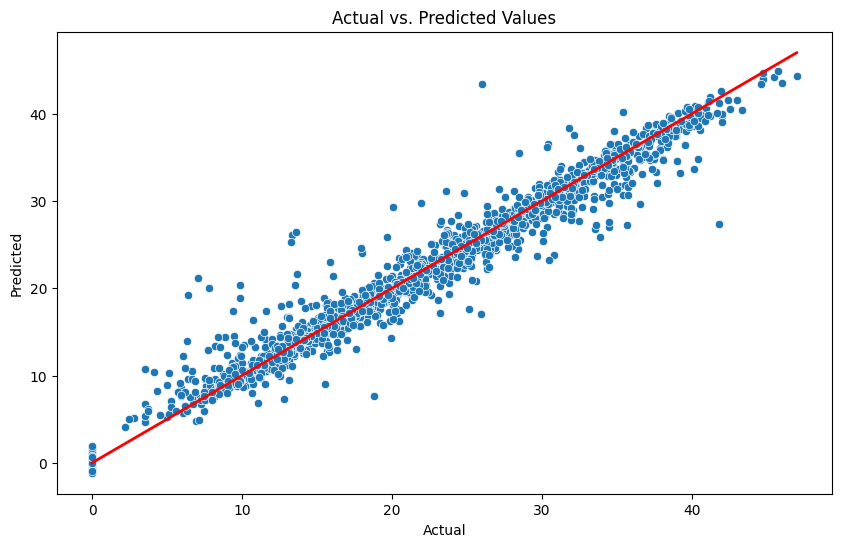

In [345]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

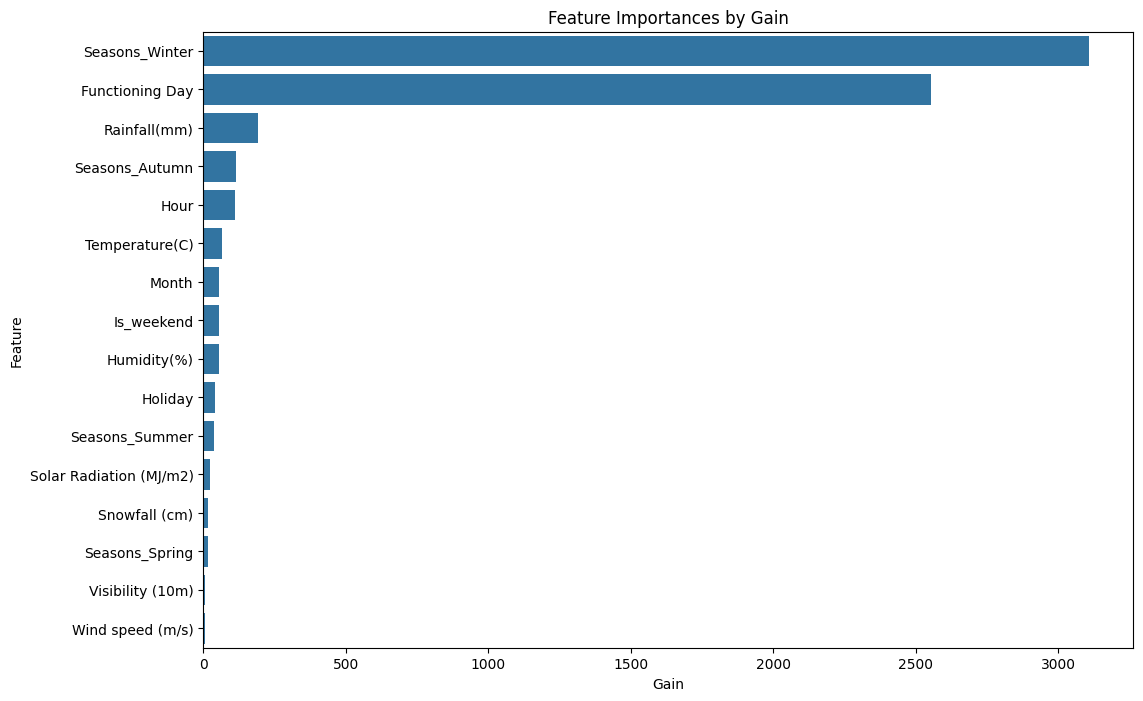

Top 5 features by gain:
            Feature         Gain
15   Seasons_Winter  3108.321777
9   Functioning Day  2552.147217
6      Rainfall(mm)   193.508255
12   Seasons_Autumn   113.152306
0              Hour   111.814247


In [346]:
importances = model.get_booster().get_score(importance_type='gain')
importances_df = pd.DataFrame(list(importances.items()),
columns=['Feature', 'Gain'])
importances_df = importances_df.sort_values(by='Gain',
ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Gain', y='Feature', data=importances_df)
plt.title('Feature Importances by Gain')
plt.show()
top_5_features = importances_df.head(5)
print("Top 5 features by gain:")
print(top_5_features)

Winter season becomes the most significant feature for splitting in the fine tuned model as compared to functioning day. R2 increases from fine tuning while rmse significantly drops.